# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
#!sudo apt-get install -y unzip
!sudo apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-20ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [2]:
!pip install split-folders
import splitfolders
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#splitfolders.ratio("input_folder", output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

#splitfolders.ratio('landmark_images/dataset/train', output="landmark_images/dataset", seed=20, ratio=(.8, 0.2))

In [3]:
import os
from PIL import Image
import glob

# Print png images in folder C:\Users\admin\
print(len(list(glob.iglob('/data/landmark_images/*/*/*.jpg'))))
for filepath in glob.iglob('/data/landmark_images/*/*/*.jpg'):
    image = Image.open(filepath)
    # summarize some details about the image
    print(image.format)
    print(image.size)
    print(image.mode)

6246
JPEG
(800, 535)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 430)
RGB
JPEG
(800, 529)
RGB
JPEG
(800, 575)
RGB
JPEG
(800, 600)
RGB
JPEG
(529, 800)
RGB
JPEG
(800, 529)
RGB
JPEG
(503, 800)
RGB
JPEG
(529, 800)
RGB
JPEG
(641, 800)
RGB
JPEG
(600, 800)
RGB
JPEG
(531, 800)
RGB
JPEG
(604, 452)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 701)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 600)
RGB
JPEG
(592, 800)
RGB
JPEG
(533, 800)
RGB
JPEG
(800, 597)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 450)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 531)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 574)
RGB
JPEG
(800, 531)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 594)
RGB
JPEG
(800, 529)
RGB
JPEG
(800, 531)
RGB
JPEG
(800, 533)
RGB
JPEG
(800, 533)
RGB
JPEG
(800, 533)
RGB
JPEG
(800, 529)
RGB
JPEG
(522, 800)
RGB
JPEG
(800, 600)
RGB
JPEG
(799, 600)
RGB
JPEG
(800, 533)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 600)
RGB
JPEG
(800, 600)
RGB
JPEG
(600, 450)
RGB
JPEG
(800, 347)

In [4]:
#importing 
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [5]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
loaders_scratch = {'train':"landmark_images/dataset/train",
                   'test':"landmark_images/test",
                   'valid':'landmark_images/dataset/val'}
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# define transform for train
transform_train = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomRotation(degrees=17),
    transforms.RandomHorizontalFlip(),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# define transform for test & valid
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# download data
train_data = datasets.ImageFolder(loaders_scratch['train'], transform = transform_train)
test_data = datasets.ImageFolder(loaders_scratch['test'], transform = transform)
valid_data=datasets.ImageFolder(loaders_scratch['valid'], transform = transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
    num_workers=num_workers, shuffle=False)

classes = train_data.classes

loaders_scratch = {'train': train_loader,
                   'valid': valid_loader,
                   'test': test_loader}

**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: At first I separated the train data from the valid, test data, so that I could do to the train, transform special in it  (Resize,RandomRotation) , In order to train the mole in more depth,
and I choose the number of subprocesses to 0  that well be used for data loading and I put the  batch size 20 for how many samples per batch to load , 0.2 the percentage of training set to use as validation, after that I convert the data to a normalized and i do two transforms  i put Resize  224 and  CenterCrop 224 ,after that I choose the training and test datasets, define samplers for obtaining training and validation batches , obtain training indices,combine dataset and sampler,Finally specify the image classes.  The size  for the input 224  to help me to gethigh accurate results.

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

In [6]:
len(classes)

50

In [7]:
classes

['00.Haleakala_National_Park',
 '01.Mount_Rainier_National_Park',
 '02.Ljubljana_Castle',
 '03.Dead_Sea',
 '04.Wroclaws_Dwarves',
 '05.London_Olympic_Stadium',
 '06.Niagara_Falls',
 '07.Stonehenge',
 '08.Grand_Canyon',
 '09.Golden_Gate_Bridge',
 '10.Edinburgh_Castle',
 '11.Mount_Rushmore_National_Memorial',
 '12.Kantanagar_Temple',
 '13.Yellowstone_National_Park',
 '14.Terminal_Tower',
 '15.Central_Park',
 '16.Eiffel_Tower',
 '17.Changdeokgung',
 '18.Delicate_Arch',
 '19.Vienna_City_Hall',
 '20.Matterhorn',
 '21.Taj_Mahal',
 '22.Moscow_Raceway',
 '23.Externsteine',
 '24.Soreq_Cave',
 '25.Banff_National_Park',
 '26.Pont_du_Gard',
 '27.Seattle_Japanese_Garden',
 '28.Sydney_Harbour_Bridge',
 '29.Petronas_Towers',
 '30.Brooklyn_Bridge',
 '31.Washington_Monument',
 '32.Hanging_Temple',
 '33.Sydney_Opera_House',
 '34.Great_Barrier_Reef',
 '35.Monumento_a_la_Revolucion',
 '36.Badlands_National_Park',
 '37.Atomium',
 '38.Forth_Bridge',
 '39.Gateway_of_India',
 '40.Stockholm_City_Hall',
 '41.Ma

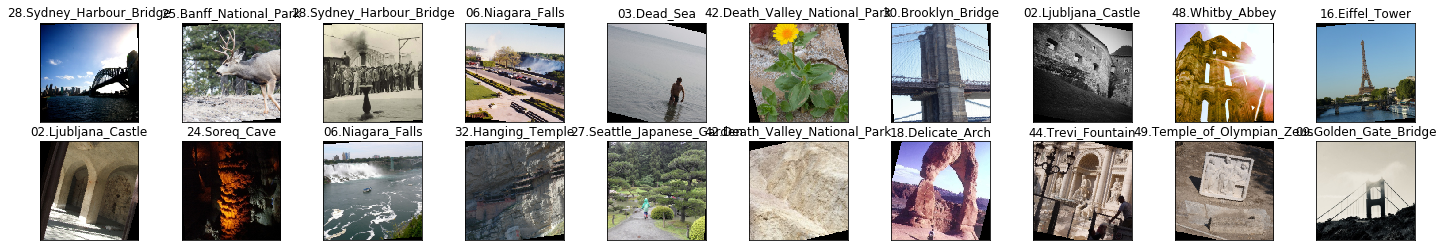

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))# convert from Tensor image
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images , batch_size = 20
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

### Initialize use_cuda variable

In [9]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [10]:
## TODO: select loss function
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

# specify loss function
criterion_scratch=nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    # specify optimizer
    optimizer=optim.SGD(model.parameters(),lr=0.01)
    
    return optimizer

In [11]:
import torch.nn as nn
import torch.nn.functional as F
# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer1
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        # convolutional layer2
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        # convolutional layer3
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        # convolutional layer4
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        # convolutional layer5
        self.conv5 = nn.Conv2d(512, 1024, 3, padding=1)
        # convolutional layer6
        self.conv6 = nn.Conv2d(1024, 2048, 3, padding=1)
        # convolutional layer7
        self.conv7 = nn.Conv2d(2048, 4096, 3, padding=1)
        
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)
        self.bn4 = nn.BatchNorm2d(512)
        self.bn5 = nn.BatchNorm2d(1024)
        self.bn6 = nn.BatchNorm2d(2048)
        self.bn7 = nn.BatchNorm2d(4096)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
         # linear layer
        self.fc1 = nn.Linear(4096, 2048)
        self.fc2 = nn.Linear(2048, 50)
        
        # dropout layer
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        ## Define forward behavior
        x = self.bn1(self.pool(F.relu(self.conv1(x))))
        x = self.bn2(self.pool(F.relu(self.conv2(x))))
        x = self.bn3(self.pool(F.relu(self.conv3(x))))
        x = self.bn4(self.pool(F.relu(self.conv4(x))))
        x = self.bn5(self.pool(F.relu(self.conv5(x))))
        x = self.bn6(self.pool(F.relu(self.conv6(x))))
        x = self.bn7(self.pool(F.relu(self.conv7(x))))
        
        # flatten image input
        x = x.view(x.size(0), -1)
        #x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
#-#-# Do NOT modify the code below this line. #-#-#
# instantiate the CNN
model_scratch = Net()
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:
I did seven convolutional layer and I chose the Padding  to be 1 and the matrix to be 3*3 and after that i do batchnormalization for the seven convolutional layer and  I chose the pooling to be Max pooling 2*2,and i do full connected convolutional layer in the forward it’s  take input x it’s inter into convolutional layer1 then  inter to relu function then do pooling and finally i do batchnormalization , after that i do flating, and because there is overfitting i do dropout.

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [12]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf # track change in validation loss
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
                #optimizer,clear the gradients of all optimized variables
                optimizer.zero_grad()
                # forward pass: compute predicted outputs by passing inputs to the model
                output = model(data)
                # calculate the batch loss
                loss = criterion(output, target)
                # backward pass: compute gradient of the loss with respect to model parameters
                loss.backward()
                # perform a single optimization step (parameter update)
                optimizer.step()
                # update training loss
                train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## TODO: update average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
             # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss)) 
            
         # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(),save_path)
            valid_loss_min = valid_loss
        
    return model

In [13]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0)

#-#-# Do NOT modify the code below this line. #-#-#  
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch,get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda,'ignore.pt')

Epoch: 1 	Training Loss: 3.556490 	Validation Loss: 3.249918
Validation loss decreased (inf --> 3.249918).Saving model ...
Epoch: 2 	Training Loss: 3.076369 	Validation Loss: 2.943102
Validation loss decreased (3.249918 --> 2.943102).Saving model ...
Epoch: 3 	Training Loss: 2.721262 	Validation Loss: 2.750722
Validation loss decreased (2.943102 --> 2.750722).Saving model ...
Epoch: 4 	Training Loss: 2.495416 	Validation Loss: 2.608949
Validation loss decreased (2.750722 --> 2.608949).Saving model ...
Epoch: 5 	Training Loss: 2.256107 	Validation Loss: 2.582935
Validation loss decreased (2.608949 --> 2.582935).Saving model ...
Epoch: 6 	Training Loss: 2.102770 	Validation Loss: 2.450318
Validation loss decreased (2.582935 --> 2.450318).Saving model ...
Epoch: 7 	Training Loss: 1.924807 	Validation Loss: 2.349706
Validation loss decreased (2.450318 --> 2.349706).Saving model ...
Epoch: 8 	Training Loss: 1.757207 	Validation Loss: 2.303556
Validation loss decreased (2.349706 --> 2.303556

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [14]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs =10

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m,'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                   criterion_scratch, use_cuda,'model_scratch.pt')

Epoch: 1 	Training Loss: 3.540312 	Validation Loss: 3.248503
Validation loss decreased (inf --> 3.248503).Saving model ...
Epoch: 2 	Training Loss: 3.061290 	Validation Loss: 3.034260
Validation loss decreased (3.248503 --> 3.034260).Saving model ...
Epoch: 3 	Training Loss: 2.741104 	Validation Loss: 2.770430
Validation loss decreased (3.034260 --> 2.770430).Saving model ...
Epoch: 4 	Training Loss: 2.488158 	Validation Loss: 2.677012
Validation loss decreased (2.770430 --> 2.677012).Saving model ...
Epoch: 5 	Training Loss: 2.305257 	Validation Loss: 2.543992
Validation loss decreased (2.677012 --> 2.543992).Saving model ...
Epoch: 6 	Training Loss: 2.125026 	Validation Loss: 2.408772
Validation loss decreased (2.543992 --> 2.408772).Saving model ...
Epoch: 7 	Training Loss: 1.952002 	Validation Loss: 2.374126
Validation loss decreased (2.408772 --> 2.374126).Saving model ...
Epoch: 8 	Training Loss: 1.794150 	Validation Loss: 2.298271
Validation loss decreased (2.374126 --> 2.298271

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))   
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.008294


Test Accuracy: 48% (609/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [16]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
loaders_transfer = {'train':"landmark_images/dataset/train",
                   'test':"landmark_images/test",
                   'valid':'landmark_images/dataset/val'}
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
# define transform for train
transform_train = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomRotation(degrees=17),
    transforms.RandomHorizontalFlip(),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# define transform for test & valid
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder('landmark_images/dataset/train', transform=transform_train)
valid_data = datasets.ImageFolder('landmark_images/dataset/val', transform=transform)
test_data = datasets.ImageFolder('landmark_images/test', transform=transform)

classes = train_data.classes
loaders_transfer = {
    'train': torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True), 
    
    'valid': torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True),
   
    'test': torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=False)}

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [17]:
## TODO: select loss function
criterion_transfer =nn.CrossEntropyLoss()

## TODO: select and return optimizer
def get_optimizer_transfer(model):
    
    optimizer = optim.SGD(model.classifier.parameters(), lr=0.001)
    
    return optimizer

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [18]:
## TODO: Specify model architecture
from torchvision import datasets, models, transforms

model_transfer = models.vgg16(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    model_transfer = model_transfer.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available. Training on CPU ...')

print(model_transfer)

#-#-# Do NOT modify the code below this line. #-#-#
if use_cuda:
    model_transfer = model_transfer.cuda()

CUDA is available!  Training on GPU ...
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I picked VGG16 as a transfer model because it performed outstanding on Image Classification, VGG16 is composed of 13 convolutional layers, 5 max-pooling layers, and 3 fully connected layers. Therefore, the number of layers having tunable parameters is 16 (13 convolutional layers and 3 fully connected layers). That is the reason why the model name is VGG16 & It is very efficient to use pre-trained networks as VGG16  to solve challenging problems in computer vision, because was trained on ImageNet for classification on a wide range of objects.
select loss function
criterion_transfer =nn.CrossEntropyLoss()
nn.CrossEntropyLoss()This criterion combines :func:nn.LogSoftmax and :func:nn.NLLLoss in one single class. It is useful when training a classification problem with C classes.
Linear(in_features=4096, out_features=1000, bias=True)
kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
use Stochastic gradient descent optimizer
optimizer : optim.SGD(model.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [19]:
# Freeze training for all "features" layers
import torch.nn as nn
for param in model_transfer.features.parameters():
    param.requires_grad = False

n_inputs = model_transfer.classifier[6].in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
                                      
last_layer = nn.Linear(n_inputs,len(classes))

model_transfer.classifier[6] = last_layer

# if GPU is available, move the model to GPU
if use_cuda :
    model_transfer.cuda()

In [20]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'
num_epochs = 10

train(num_epochs,loaders_transfer,model_transfer,get_optimizer_transfer(model_transfer),
     criterion_transfer,use_cuda,'model_transfer.pt')

#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3.735140 	Validation Loss: 3.356345
Validation loss decreased (inf --> 3.356345).Saving model ...
Epoch: 2 	Training Loss: 3.164841 	Validation Loss: 2.803656
Validation loss decreased (3.356345 --> 2.803656).Saving model ...
Epoch: 3 	Training Loss: 2.672201 	Validation Loss: 2.329377
Validation loss decreased (2.803656 --> 2.329377).Saving model ...
Epoch: 4 	Training Loss: 2.301440 	Validation Loss: 1.988455
Validation loss decreased (2.329377 --> 1.988455).Saving model ...
Epoch: 5 	Training Loss: 2.054206 	Validation Loss: 1.750630
Validation loss decreased (1.988455 --> 1.750630).Saving model ...
Epoch: 6 	Training Loss: 1.853599 	Validation Loss: 1.598833
Validation loss decreased (1.750630 --> 1.598833).Saving model ...
Epoch: 7 	Training Loss: 1.752024 	Validation Loss: 1.474739
Validation loss decreased (1.598833 --> 1.474739).Saving model ...
Epoch: 8 	Training Loss: 1.659752 	Validation Loss: 1.388677
Validation loss decreased (1.474739 --> 1.388677

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [21]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.252069


Test Accuracy: 67% (845/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [22]:
import cv2
from PIL import Image
import numpy
classes = train_data.classes
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))])
def predict_landmarks(img_path, k):
#Process_image : use transform of PIL
        img = Image.open(img_path).convert('RGB')
        img = transform(img)
        img.unsqueeze_(0)
        if use_cuda:
            img = img.cuda()
        model_transfer.eval()
        with torch.no_grad():
              img = model_transfer(img.cuda())
        probs, class_indices = torch.topk(img, k)
        return [classes[class_idx] for class_idx in class_indices[0]]
        #return top_p, top_class #, classes[top_class]  
# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['38.Forth_Bridge',
 '09.Golden_Gate_Bridge',
 '30.Brooklyn_Bridge',
 '28.Sydney_Harbour_Bridge',
 '06.Niagara_Falls']

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm?
* Actually yes the output better than i expected.
* Model accuracy when we add a more image augmentations (flipping,ect..) that may be wil helpful to increase model accuracy and wil improve performance on test data.
* Tuning hyper parameters number of epochs, parameters, etc.....
* Better implementation in case when there are multiple landmarks  in an image or multiple landmarks and humans in an image.

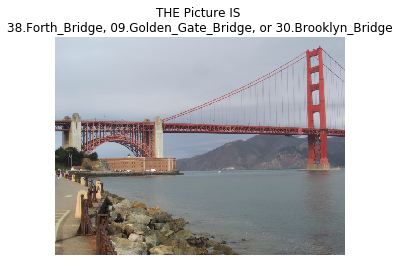

In [23]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    top_predictions = predict_landmarks(img_path, 3) #0,1,2 top 3
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title('THE Picture IS \n{}, {}, or {}'.format(top_predictions[0], top_predictions[1], top_predictions[2]))
    plt.axis('off')
    plt.show()
    #print('The result is :',predicted_landmarks[0])#the result

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

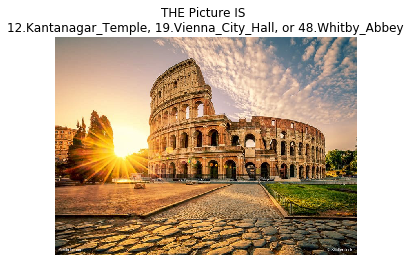

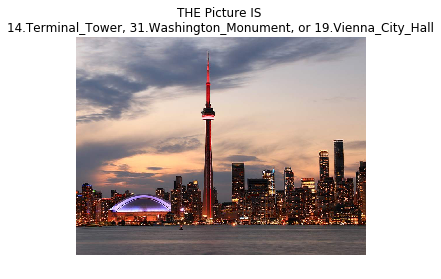

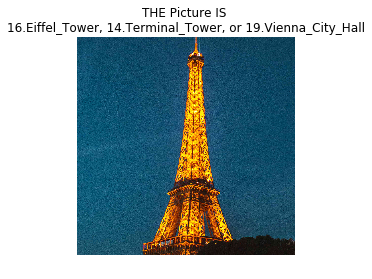

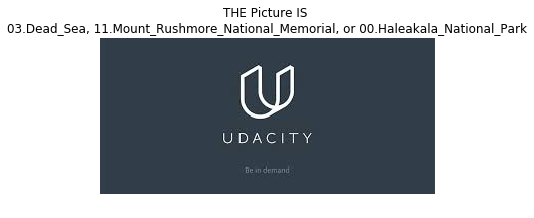

In [24]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed. 
def showing_images(path):
    suggest_locations(path)
showing_images('Colosseum-in-Rome-at-sunrise.jpeg')
showing_images('canadian-landmarks-cn-tower.jpeg')
showing_images('TAM_3411-c52ec586f3324ff19009f8fa08b04898.jpeg')
showing_images('download.jpeg')

# Sources :
* Udacity class room Lesson(Convolutional Neural Networks,transfer learning,Weight Initialization)
* https://stackoverflow.com/
* https://pytorch.org/vision/stable/transforms.html
* https://www.tensorflow.org/tutorials/images/cnn
* https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
* https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
* https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
* https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/
* https://medium.com/@shikharsrivastava_14544/face-recognition-using-transfer-learning-with-vgg16-3caeca4a916e